### NOMBRE PROYECTO: Describir el Nombre del Proyecto

### FECHA: 

## CONTEXTO
* Los bancos, como intermediarios financieros, prestan dinero a quienes cumplen con los requisitos establecidos. Sin embargo, cuando llega el momento, una parte de los prestatarios incumplen con sus obligaciones y se atrasan en los pagos. Para el mes de julio del presente año, la morosidad en el sistema financiero peruano se ubicó en 4.04%, en las Mypes fue de 8.07% y en las Cajas Rurales fue de 11.25% (RPP Noticias, 05 de julio de 2021). Según Jorge C. (Diario La República, 09 de febrero de 2020), profesor de la Pacífico Business School, comenta que una de las posibles causas es que la gente aglomera gastos […] pequeños e inconscientes a través de las líneas de crédito asignadas a sus trajetas (tasa promedio anual de 46%, y en retiro de efectivo es de 120% anual). La forma en que los bancos evalúan la posibilidad o no de un crédito es a través del Score de calificación crediticia del cliente. Un score mayor significa un perfil crediticio mejor. Otra forma de evaluación es por medio del nivel de ahorro, y este va de cero a doce, significando este último un 'alto nivel de ahorros'. El atraso histórico (en número de días) también juega un rol importante, así como la calificación absoluta del cliente como 'pagador al día' u 'cliente moroso'. De otro lado, la SBS también clasifica el riesgo de cada crédito: 'cero' es normal, y el nivel 'cuatro' es pérdida. Sin embargo ¿Cómo afectaría la morosidad al banco? "Un incremento en la morosidad aumenta el nivel de riesgo, por tanto crecen las provisiones solicitadas por el regulador (dinero inmovilizado, y que no puede ser prestado). Esta es una forma de afectación, como a la rentabilidad de la entidad financiera, por ejemplo" (Conexión Esan, 13 de diciembre de 2016). Viendo desde el punto de vista del banco, la pregunta sería ¿Qué insights podemos hallar en los datos históricos que nos permitan tomar mejores decisiones antes de efectuar los préstamos? Es así que este trabajo pretende hallar dichos insights, considerados aún invisibles, y relacionados a la morosidad bancaria peruana a través de la formulación de preguntas sencillas. La revisión, limpieza, transformación y modelación de datos servirán de apoyo en la búsqueda de conclusiones, y la guía en la toma de decisiones.

DOI, APA:

Luis Humberto Calderon Baldeón. (2021). BankDefaultAnalysis [Data set]. Kaggle.

https://doi.org/10.34740/KAGGLE/DSV/2528417



### DESCRIPCIÓN DE LA DATA

* **Mora Morosidad del cliente:** {0: paga al día, 1: cliente moroso}
* **Atraso** Atraso histórico del cliente en días.
* **Vivienda** Tipo de vivienda del cliente.
* **Edad** Edad del cliente.
* **Días_lab** Días laborados en su actual empleo.
* **Exp_sf** Meses con experiencia en el sistema financiero, es decir el número de meses que tiene el cliente desde que adquirió algún producto financiero.
* **Nivel_ahorro** Índice del nivel de ahorro del cliente: {0: no tiene ahorros, 12: alto nivel de ahorros}
* **Ingreso**	Ingresos del cliente.
* **Línea_sf** Línea de crédito en el sistema financiero que el cliente tiene disponible.
* **Deuda_sf** Deuda del cliente en el sistema financiero.
* **Score** Calificación crediticia del cliente. Mientras mayor es el score, mejor perfil crediticio tiene el cliente.
* **Zona** Departamento de residencia del cliente.
* **Clasif_sbs** Clasificación SBS. Mientras mayor es el número, peor clasificación tiene el cliente: {0: normal, 1: con problemas potenciales, 2: deficiente, 3: dudoso, * 4: pérdida}
* **Nivel_educ**	Nivel educativo máximo alcanzado por el cliente.



## METODOLOGÍA UTILIZADA EN EL PROYECTO DE CIENCIA DE DATOS
## NOMBRE: CRISP-DM
* FASE 1: Comprensión del Negocio: objetivos especificos de la fase
* FASE 2: Comprensión de los datos: objetivos especificos de la fase
* FASE 3: Preparación de los datos: objetivos especificos de la fase
* FASE 4: Modelado: objetivos especificos de la fase
* FASE 5: Evaluación del modelo: objetivos especificos de la fase
* FASE 6: Despliegue: objetivos especificos de la fase

# FASE 1: Comprensión del Negocio

In [387]:
# Carga de librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [388]:
#Carga Dataset
df = pd.read_csv('data.csv', sep=",")

# FASE 2: Comprensión de los datos

In [389]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset:
   mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  \
0     0     235  FAMILIAR    30      3748    93.0             5   3500.0   
1     0      18  FAMILIAR    32      4598     9.0            12    900.0   
2     0       0  FAMILIAR    26      5148     8.0             2   2400.0   
3     0       0  FAMILIAR    36      5179    20.0            12   2700.0   
4     0       0  FAMILIAR    46      3960     NaN             1   3100.0   

   linea_sf  deuda_sf  score         zona  clasif_sbs     nivel_educ  
0       NaN      0.00    214         Lima           4  UNIVERSITARIA  
1   1824.67   1933.75    175  La Libertad           1        TECNICA  
2   2797.38    188.29    187         Lima           0  UNIVERSITARIA  
3       NaN      0.00    187       Ancash           0        TECNICA  
4   2000.00  11010.65    189         Lima           0        TECNICA  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries,

In [390]:
df.describe()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,8399.000000,8399.00000,8399.000000,8399.000000,6569.000000,8399.000000,8399.000000,7272.000000,7938.000000,8399.000000,8399.000000
mean,0.704251,4.46315,36.399095,5555.888796,32.401583,10.593166,4350.406997,11987.241038,6110.724308,196.619955,0.563519
std,0.456406,14.27084,9.825764,2153.244140,32.866232,3.374619,5367.058953,21322.801655,11177.989799,19.544348,0.905637
min,0.000000,0.00000,20.000000,2956.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.000000
25%,0.000000,0.00000,29.000000,4174.000000,7.000000,12.000000,1366.670000,1169.372500,478.320000,182.000000,0.000000
50%,1.000000,0.00000,34.000000,4904.000000,20.000000,12.000000,2400.000000,4030.120000,2258.755000,197.000000,0.000000
75%,1.000000,2.00000,42.000000,6182.000000,51.000000,12.000000,4900.000000,12086.627500,5755.150000,212.000000,1.000000
max,1.000000,245.00000,85.000000,20700.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,4.000000


In [391]:
info = df.shape
print("\nLa cantidad de filas y columnas en nuestro dataframe es de:",info)


La cantidad de filas y columnas en nuestro dataframe es de: (8399, 14)


In [392]:
tipos = df.dtypes
print("\nTipos de datos presentes en el dataset:\n",tipos)


Tipos de datos presentes en el dataset:
 mora              int64
atraso            int64
vivienda         object
edad              int64
dias_lab          int64
exp_sf          float64
nivel_ahorro      int64
ingreso         float64
linea_sf        float64
deuda_sf        float64
score             int64
zona             object
clasif_sbs        int64
nivel_educ       object
dtype: object


In [393]:
df.head()

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA


## Análisis Univariado

### Análisis Univariado: **Ingreso**

Análisis Univariado de la Variable 'Ingreso'
Media: 4350.41
Mediana: 2400.00
Desviación Estándar: 5366.74
Valor Mínimo: 123.70
Valor Máximo: 30000.00


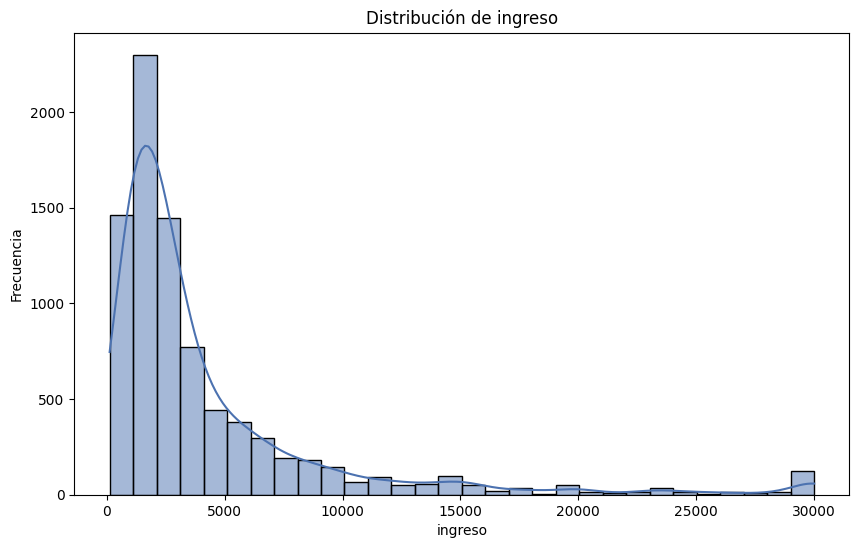

In [394]:
# Descripción estadística básica de la variable 'Profoundity'
Ingreso_mean = np.mean(df['ingreso'])
Ingreso_median = np.median(df['ingreso'])
Ingreso_std = np.std(df['ingreso'])
Ingreso_min = np.min(df['ingreso'])
Ingreso_max = np.max(df['ingreso'])

print("Análisis Univariado de la Variable 'Ingreso'")
print(f"Media: {Ingreso_mean:.2f}")
print(f"Mediana: {Ingreso_median:.2f}")
print(f"Desviación Estándar: {Ingreso_std:.2f}")
print(f"Valor Mínimo: {Ingreso_min:.2f}")
print(f"Valor Máximo: {Ingreso_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['ingreso'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de ingreso')
plt.xlabel('ingreso')
plt.ylabel('Frecuencia')
plt.show()

- Media (4350.41): El promedio de ingresos en la muestra es de 4350.41 unidades monetarias. Sin embargo, este valor puede estar influenciado por valores extremos, dado que la media es considerablemente mayor que la mediana.
- Mediana (2400.00): La mediana, que representa el ingreso medio de la población, es bastante más baja que la media, lo que indica una distribución sesgada hacia la derecha (sesgo positivo), con una mayor proporción de personas que tienen ingresos más bajos y unos pocos con ingresos muy altos.
- Desviación Estándar (5366.74): Hay una alta dispersión en los ingresos, lo que sugiere que existen grandes diferencias entre los individuos en cuanto a sus niveles de ingreso.
- Valor Mínimo (123.70) y Valor Máximo (30000.00): La variabilidad de los ingresos es amplia, con un ingreso mínimo bastante bajo y un ingreso máximo de 30,000, lo que confirma que la muestra incluye tanto personas de bajos ingresos como algunas de muy altos ingresos.

Análisis Univariado de la Variable 'nivel_ahorro'
Media: 10.59
Mediana: 12.00
Desviación Estándar: 3.37
Valor Mínimo: 0.00
Valor Máximo: 12.00


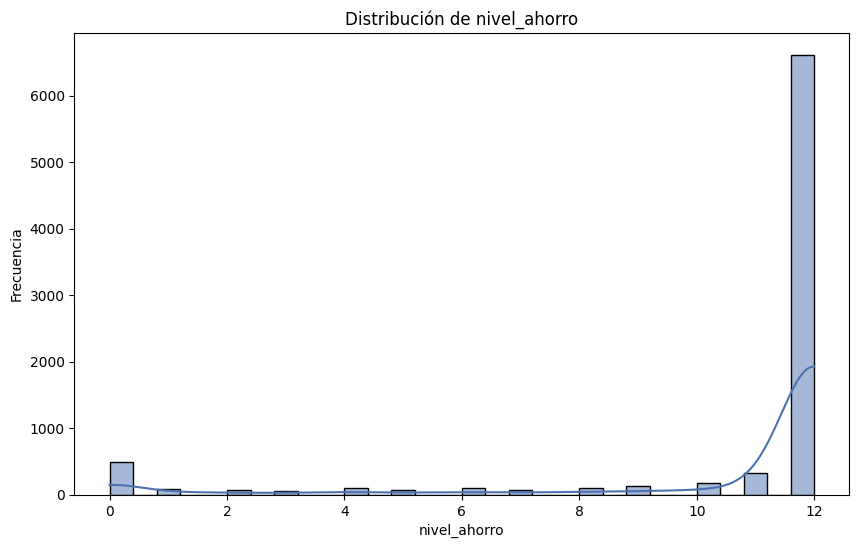

In [395]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['nivel_ahorro'])
profundity_median = np.median(df['nivel_ahorro'])
profundity_std = np.std(df['nivel_ahorro'])
profundity_min = np.min(df['nivel_ahorro'])
profundity_max = np.max(df['nivel_ahorro'])

print("Análisis Univariado de la Variable 'nivel_ahorro'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['nivel_ahorro'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de nivel_ahorro')
plt.xlabel('nivel_ahorro')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Univariado: **Edad**

Análisis Univariado de la Variable 'edad'
Media: 36.40
Mediana: 34.00
Desviación Estándar: 9.83
Valor Mínimo: 20.00
Valor Máximo: 85.00


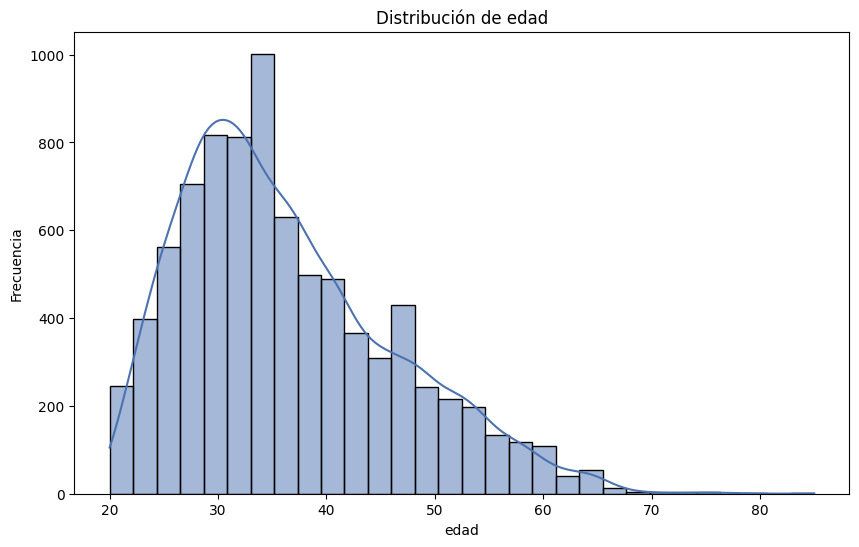

In [396]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['edad'])
profundity_median = np.median(df['edad'])
profundity_std = np.std(df['edad'])
profundity_min = np.min(df['edad'])
profundity_max = np.max(df['edad'])

print("Análisis Univariado de la Variable 'edad'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de edad')
plt.xlabel('edad')
plt.ylabel('Frecuencia')
plt.show()

- Media (36.40): La edad promedio de las personas en la muestra es de 36.4 años, lo que sugiere una muestra adulta de personas en su mayoría en edad laboral.
- Mediana (34.00): La mediana de 34 años está cerca de la media, lo que sugiere una distribución de edades relativamente simétrica, aunque con algunos individuos mayores.
- Desviación Estándar (9.83): Existe una moderada dispersión en las edades, lo que indica cierta variabilidad, pero no una dispersión extrema.
- Valor Mínimo (20.00) y Valor Máximo (85.00): La muestra incluye desde jóvenes de 20 años hasta adultos mayores de 85 años, cubriendo un amplio rango de edades.

### Análisis Univariado: **Días laborales**

Análisis Univariado de la Variable 'Dias_lab'
Media: 5555.89
Mediana: 4904.00
Desviación Estándar: 2153.12
Valor Mínimo: 2956.00
Valor Máximo: 20700.00


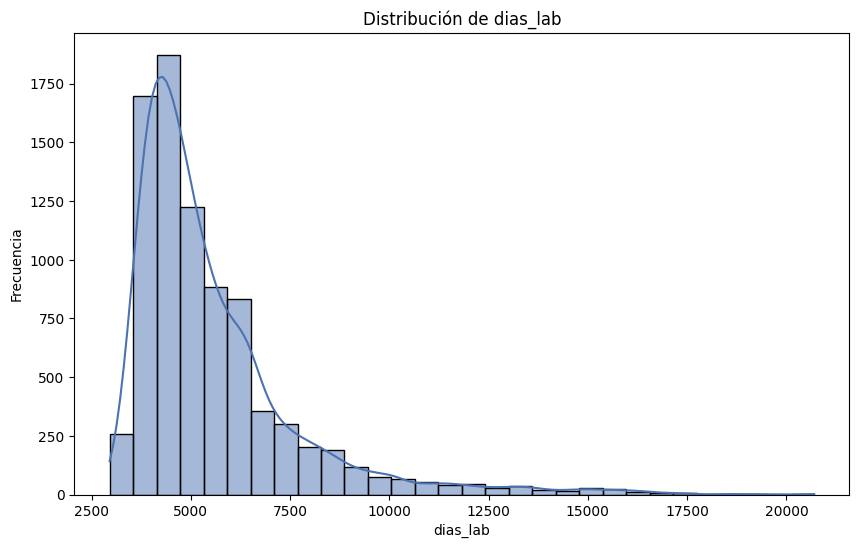

In [397]:
# Descripción estadística básica de la variable 'dias_lab'
dias_lab_mean = np.mean(df['dias_lab'])
dias_lab_median = np.median(df['dias_lab'])
dias_lab_std = np.std(df['dias_lab'])
dias_lab_min = np.min(df['dias_lab'])
dias_lab_max = np.max(df['dias_lab'])

print("Análisis Univariado de la Variable 'Dias_lab'")
print(f"Media: {dias_lab_mean:.2f}")
print(f"Mediana: {dias_lab_median:.2f}")
print(f"Desviación Estándar: {dias_lab_std:.2f}")
print(f"Valor Mínimo: {dias_lab_min:.2f}")
print(f"Valor Máximo: {dias_lab_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['dias_lab'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de dias_lab')
plt.xlabel('dias_lab')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Univariado: **Zona**

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
zona
Lima           4980
Callao          507
La Libertad     447
Arequipa        349
Ica             300
Piura           279
Lambayeque      279
Junin           263
Ancash          224
Cajamarca       173
Loreto          118
Cuzco            96
Ucayali          85
Pasco            53
Moquegua         46
San Martin       45
Huanuco          37
Tacna            32
Puno             23
Ayacucho         23
Name: count, dtype: int64
Moda (Categoría más frecuente): Lima


C:\Users\lea\AppData\Local\Temp\ipykernel_9520\563051029.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='zona', data=df[df['zona'].isin(zona_top10_frecuencia.index)], order=zona_top10_frecuencia.index, palette='Set2')


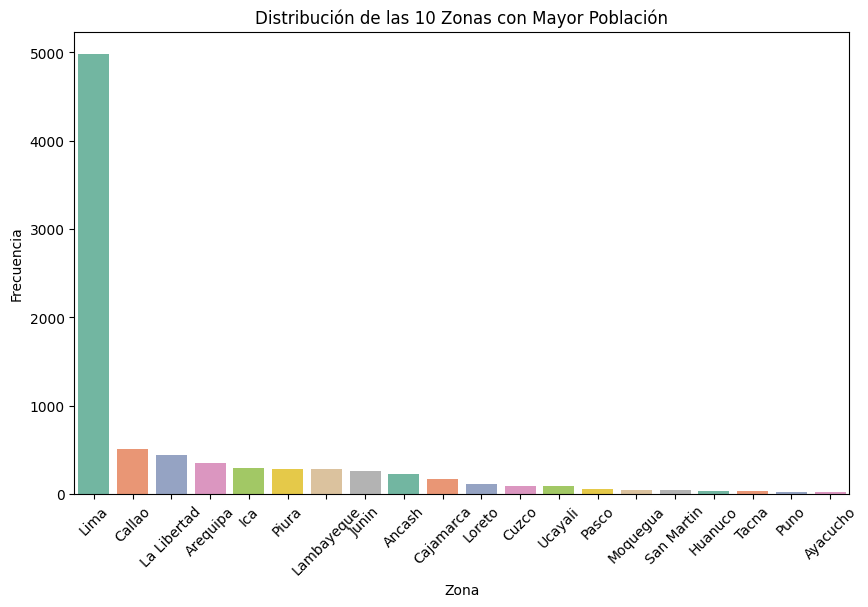

In [398]:
# Descripción estadística básica de la variable 'zona' (top 10)
zona_top10_frecuencia = df['zona'].value_counts().head(20)
zona_moda_top10 = zona_top10_frecuencia.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{zona_top10_frecuencia}")
print(f"Moda (Categoría más frecuente): {zona_moda_top10}")

# Gráfico de barras para las 10 zonas con mayor población
plt.figure(figsize=(10, 6))
sns.countplot(x='zona', data=df[df['zona'].isin(zona_top10_frecuencia.index)], order=zona_top10_frecuencia.index, palette='Set2')
plt.title('Distribución de las 10 Zonas con Mayor Población')
plt.xlabel('Zona')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


- **Frecuencia:**
"Lima" tiene la mayor cantidad de observaciones, con 4980 casos, lo que indica que la mayoría de las personas en el dataset provienen de esta zona.
Otras regiones con una cantidad significativa de observaciones incluyen "Callao", "La Libertad", "Arequipa" e "Ica".
Algunas zonas, como "Huancavelica" y "Amazonas", tienen muy pocos casos, lo que puede indicar una representación desproporcionada en el dataset.
- **Moda:**
La moda es "Lima", lo que muestra que esta zona tiene la mayor representación en el dataset.

### Análisis Univariado: **Nivel educación**

Análisis Univariado de la Variable 'nivel_educ'
Frecuencia de cada categoría:
nivel_educ
UNIVERSITARIA    4802
TECNICA          3288
SECUNDARIA        267
SIN EDUCACION      42
Name: count, dtype: int64
Moda (Categoría más frecuente): UNIVERSITARIA


C:\Users\lea\AppData\Local\Temp\ipykernel_9520\2155837078.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nivel_educ', data=df, palette='Set2')


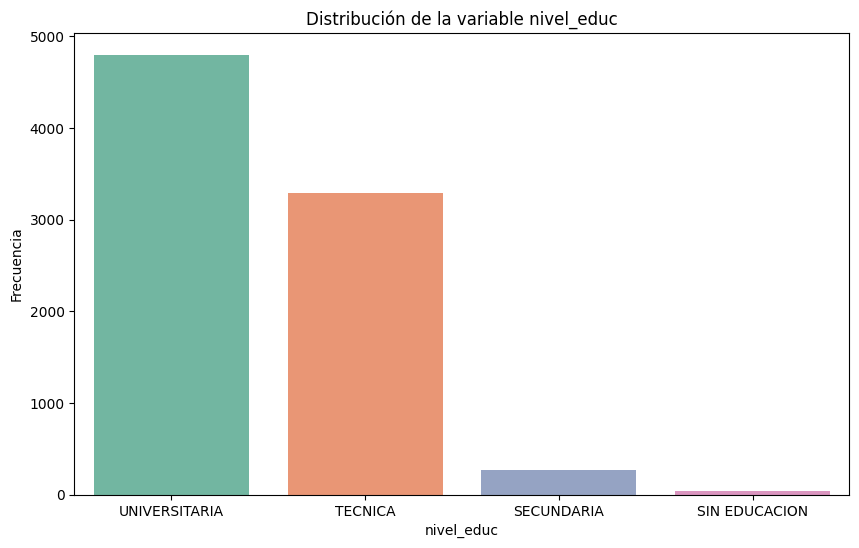

In [399]:
# Descripción estadística básica de la variable 'nivel_educ's
zona_frecuencia = df['nivel_educ'].value_counts()
zona_moda = df['nivel_educ'].mode()[0]

print("Análisis Univariado de la Variable 'nivel_educ'")
print(f"Frecuencia de cada categoría:\n{zona_frecuencia}")
print(f"Moda (Categoría más frecuente): {zona_moda}")

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='nivel_educ', data=df, palette='Set2')
plt.title('Distribución de la variable nivel_educ')
plt.xlabel('nivel_educ')
plt.ylabel('Frecuencia')
plt.show()

- **Frecuencia:**
La categoría más frecuente es "UNIVERSITARIA", con 4802 observaciones. Esto indica que la mayoría de las personas en el dataset tienen educación universitaria.
Le sigue "TECNICA" con 3288 observaciones, lo que también muestra un número significativo de personas con educación técnica.
"SECUNDARIA" y "SIN EDUCACION" tienen frecuencias mucho menores, lo que sugiere que son menos comunes en el dataset.
- **Moda:**
La moda es "UNIVERSITARIA", lo que confirma que la mayoría de las personas en el dataset tienen este nivel educativo.

## Análisis Bivariado

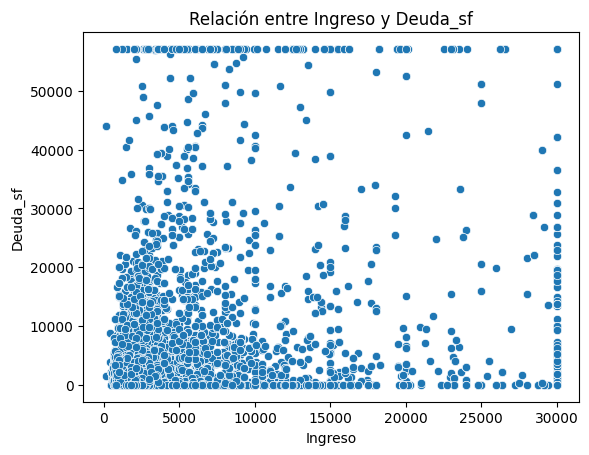

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='ingreso', y='deuda_sf', data=df)
plt.title('Relación entre Ingreso y Deuda_sf')
plt.xlabel('Ingreso')
plt.ylabel('Deuda_sf')
plt.show()


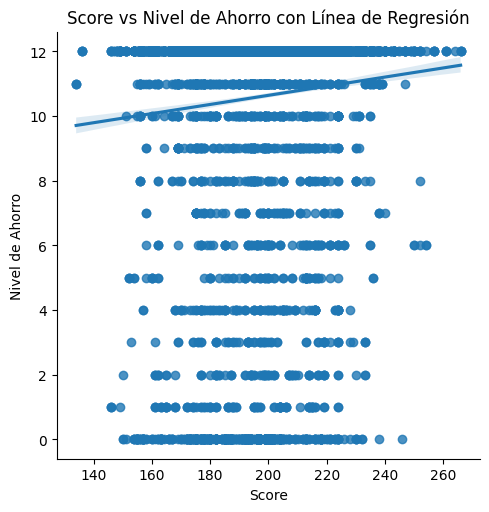

In [401]:
sns.lmplot(x='score', y='nivel_ahorro', data=df)
plt.title('Score vs Nivel de Ahorro con Línea de Regresión')
plt.xlabel('Score')
plt.ylabel('Nivel de Ahorro')
plt.show()


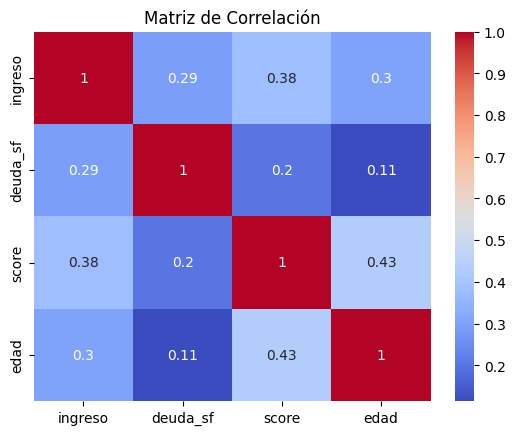

In [402]:
corr = df[['ingreso', 'deuda_sf', 'score', 'edad']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


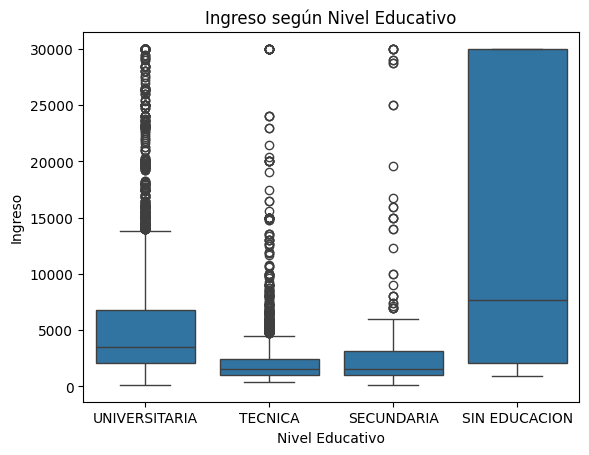

In [403]:
sns.boxplot(x='nivel_educ', y='ingreso', data=df)
plt.title('Ingreso según Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso')
plt.show()


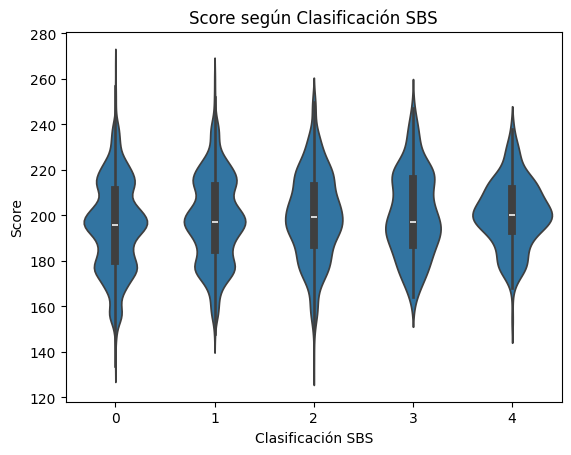

In [404]:
sns.violinplot(x='clasif_sbs', y='score', data=df)
plt.title('Score según Clasificación SBS')
plt.xlabel('Clasificación SBS')
plt.ylabel('Score')
plt.show()


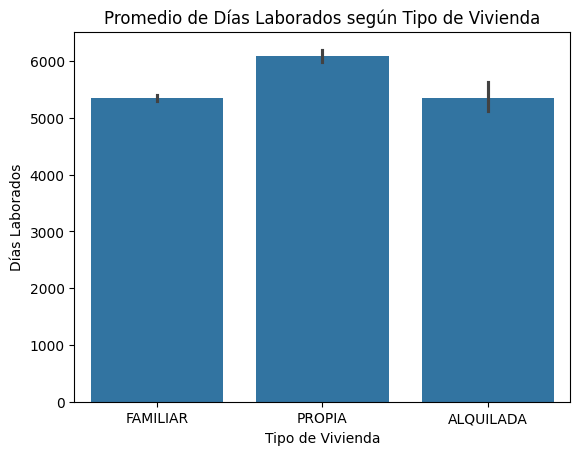

In [405]:
sns.barplot(x='vivienda', y='dias_lab', data=df)
plt.title('Promedio de Días Laborados según Tipo de Vivienda')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Días Laborados')
plt.show()


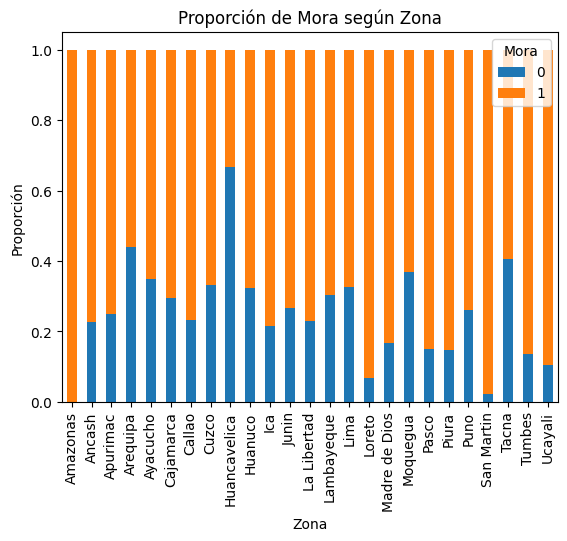

In [406]:
tabla_contingencia = pd.crosstab(df['zona'], df['mora'], normalize='index')
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Proporción de Mora según Zona')
plt.xlabel('Zona')
plt.ylabel('Proporción')
plt.legend(title='Mora', loc='upper right')
plt.show()


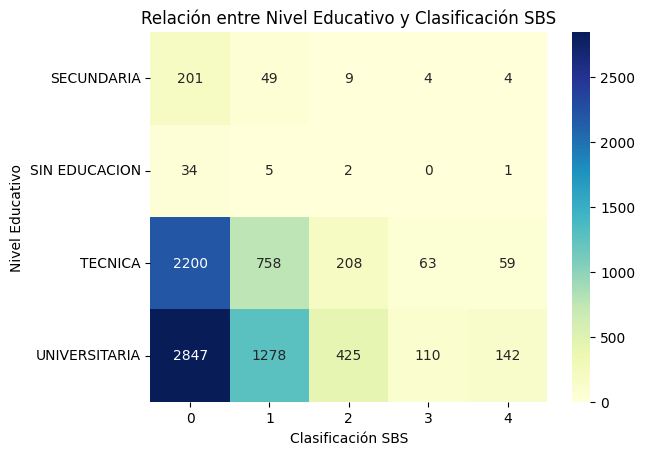

In [407]:
tabla_contingencia = pd.crosstab(df['nivel_educ'], df['clasif_sbs'])
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Nivel Educativo y Clasificación SBS')
plt.xlabel('Clasificación SBS')
plt.ylabel('Nivel Educativo')
plt.show()


## Análisis de Tendencias

### 1. ¿Qué factores influyen en que un cliente sea moroso?
- **Objetivo:** Explorar qué variables tienen una fuerte relación con la morosidad.

### se necesita transformaciopn de los datos cualitativos como vivienda educacion etc para poder realizar este grafico

### 2. ¿Existe una relación entre el nivel de ingresos y la probabilidad de ser moroso?
- **Objetivo:** Explorar si los clientes con menores ingresos tienden a ser más morosos.

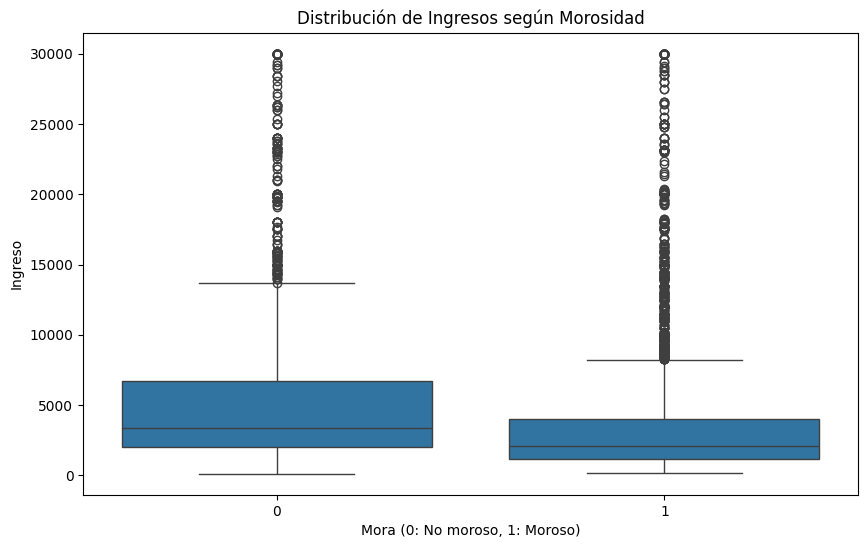

In [408]:
plt.figure(figsize=(10, 6))
plt.title("Distribución de Ingresos según Morosidad")
sns.boxplot(x='mora', y='ingreso', data=df)
plt.xlabel("Mora (0: No moroso, 1: Moroso)")
plt.ylabel("Ingreso")
plt.show()


### 3. ¿Cómo afecta la clasificación SBS a la morosidad?
- **Objetivo:** Investigar si una clasificación SBS más alta (peor) está asociada a una mayor probabilidad de morosidad.

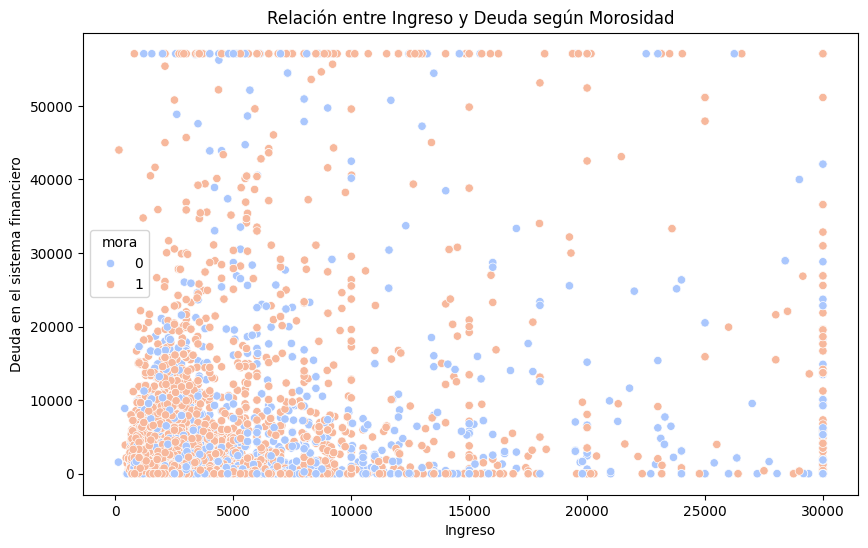

In [409]:
plt.figure(figsize=(10, 6))
plt.title("Relación entre Ingreso y Deuda según Morosidad")
sns.scatterplot(x='ingreso', y='deuda_sf', hue='mora', data=df, palette='coolwarm')
plt.xlabel("Ingreso")
plt.ylabel("Deuda en el sistema financiero")
plt.show()


### 4. ¿Hay alguna relación entre el nivel educativo y la morosidad?
- **Objetivo:** Determinar si el nivel educativo influye en la probabilidad de ser deudor.

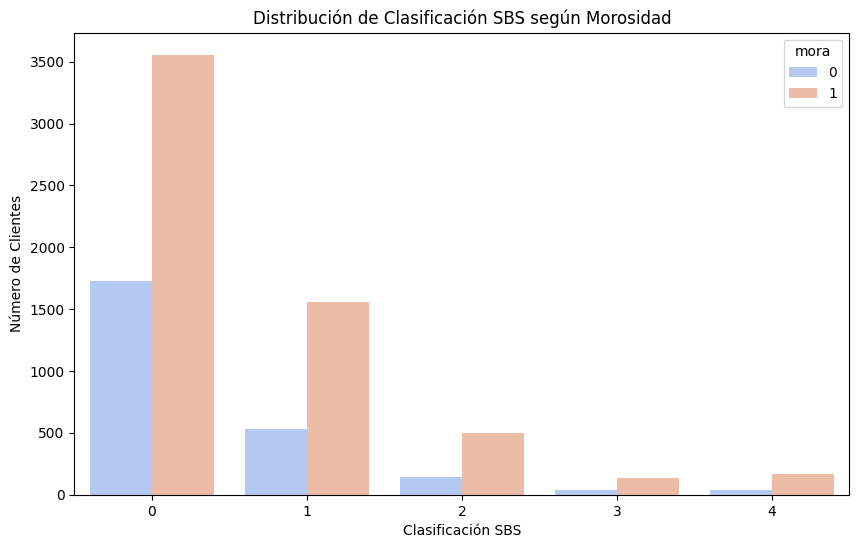

In [410]:
plt.figure(figsize=(10, 6))
plt.title("Distribución de Clasificación SBS según Morosidad")
sns.countplot(x='clasif_sbs', hue='mora', data=df, palette='coolwarm')
plt.xlabel("Clasificación SBS")
plt.ylabel("Número de Clientes")
plt.show()


### 5. ¿Influye el tipo de vivienda en la morosidad?
- **Objetivo:** Analizar si el tipo de vivienda del cliente está asociado a la morosidad.

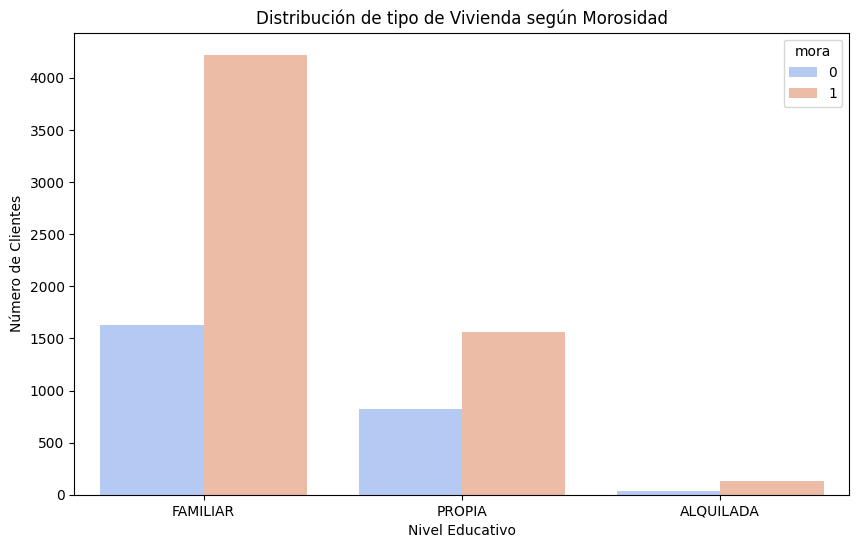

In [411]:
plt.figure(figsize=(10, 6))
plt.title("Distribución de tipo de Vivienda según Morosidad")
sns.countplot(x='vivienda', hue='mora', data=df, palette='coolwarm')
plt.xlabel("Nivel Educativo")
plt.ylabel("Número de Clientes")
plt.show()


### 6. ¿Cómo se relacionan la experiencia en el sistema financiero y los días laborados con la morosidad?
- **Objetivo:** Ver si tener más experiencia financiera o haber trabajado más tiempo en el mismo empleo reduce la probabilidad de ser moroso.

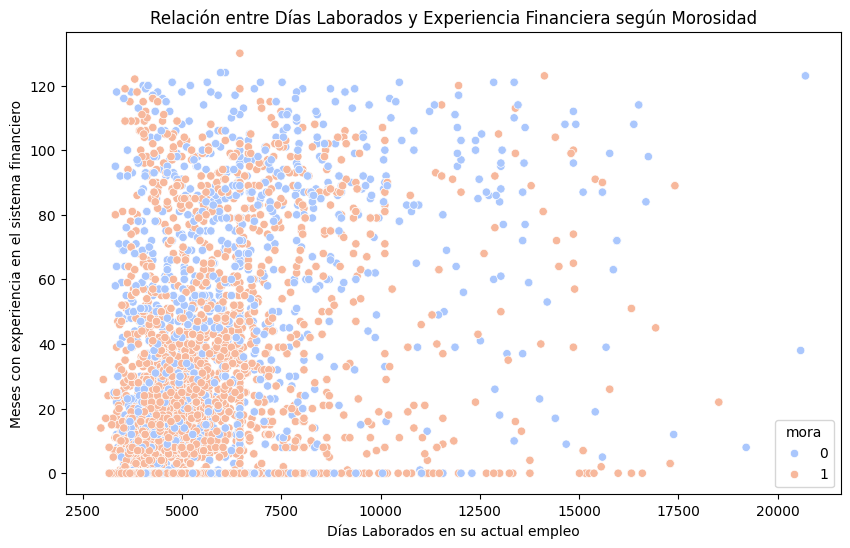

In [412]:
plt.figure(figsize=(10, 6))
plt.title("Relación entre Días Laborados y Experiencia Financiera según Morosidad")
sns.scatterplot(x='dias_lab', y='exp_sf', hue='mora', data=df, palette='coolwarm')
plt.xlabel("Días Laborados en su actual empleo")
plt.ylabel("Meses con experiencia en el sistema financiero")
plt.show()


### 7. ¿Los clientes con mayor deuda en el sistema financiero tienen mayor probabilidad de ser morosos?
- **Objetivo:** Explorar si una deuda más alta en el sistema financiero se asocia con una mayor tasa de morosidad.

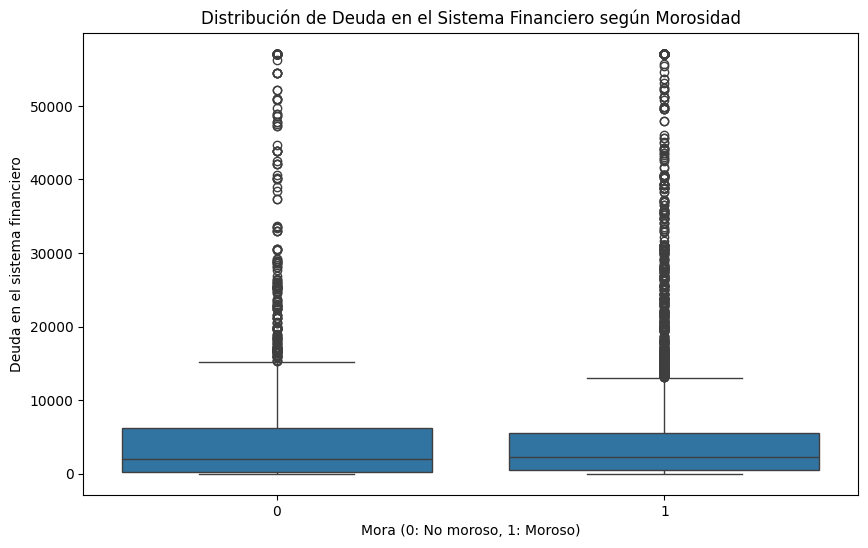

In [413]:
plt.figure(figsize=(10, 6))
plt.title("Distribución de Deuda en el Sistema Financiero según Morosidad")
sns.boxplot(x='mora', y='deuda_sf', data=df)
plt.xlabel("Mora (0: No moroso, 1: Moroso)")
plt.ylabel("Deuda en el sistema financiero")
plt.show()


In [414]:
valores_unicos = df['vivienda'].unique()
print(valores_unicos)


['FAMILIAR' 'PROPIA' 'ALQUILADA']


In [415]:
df.dtypes

mora              int64
atraso            int64
vivienda         object
edad              int64
dias_lab          int64
exp_sf          float64
nivel_ahorro      int64
ingreso         float64
linea_sf        float64
deuda_sf        float64
score             int64
zona             object
clasif_sbs        int64
nivel_educ       object
dtype: object

In [416]:
df.isnull().sum()

mora               0
atraso             0
vivienda           0
edad               0
dias_lab           0
exp_sf          1830
nivel_ahorro       0
ingreso            0
linea_sf        1127
deuda_sf         461
score              0
zona               0
clasif_sbs         0
nivel_educ         0
dtype: int64

In [417]:
df[df.isnull().any(axis=1)]

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA
8,0,2,FAMILIAR,30,5026,NaN,0,2000.0,7315.41,0.00,156,Piura,0,UNIVERSITARIA
9,0,0,FAMILIAR,31,4964,NaN,4,3800.0,NaN,0.00,192,Ica,0,TECNICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,1,0,PROPIA,57,15375,NaN,12,1340.0,NaN,313.53,232,Lima,0,UNIVERSITARIA
4974,1,0,FAMILIAR,57,15556,2.0,12,9000.0,NaN,0.00,200,Lima,0,TECNICA
4975,1,0,PROPIA,58,16592,NaN,12,3100.0,632.49,947.35,231,Lima,1,UNIVERSITARIA
4978,1,0,FAMILIAR,44,6456,90.0,12,30000.0,NaN,439.19,197,Lambayeque,4,SIN EDUCACION


In [418]:
df['nivel_educ'].unique()

array(['UNIVERSITARIA', 'TECNICA', 'SECUNDARIA', 'SIN EDUCACION'],
      dtype=object)

In [419]:
df.isnull().sum()

mora               0
atraso             0
vivienda           0
edad               0
dias_lab           0
exp_sf          1830
nivel_ahorro       0
ingreso            0
linea_sf        1127
deuda_sf         461
score              0
zona               0
clasif_sbs         0
nivel_educ         0
dtype: int64

In [420]:
df['exp_sf'].head

<bound method NDFrame.head of 0        93.0
1         9.0
2         8.0
3        20.0
4         NaN
        ...  
8394    106.0
8395     25.0
8396     19.0
8397      7.0
8398     51.0
Name: exp_sf, Length: 8399, dtype: float64>

In [421]:
df['linea_sf'].head

<bound method NDFrame.head of 0             NaN
1         1824.67
2         2797.38
3             NaN
4         2000.00
          ...    
8394    121543.40
8395      2200.00
8396     10087.00
8397     23994.00
8398      9060.00
Name: linea_sf, Length: 8399, dtype: float64>

In [422]:
df['deuda_sf'].head

<bound method NDFrame.head of 0           0.00
1        1933.75
2         188.29
3           0.00
4       11010.65
          ...   
8394     8338.46
8395        0.00
8396      933.68
8397    13954.65
8398    10555.83
Name: deuda_sf, Length: 8399, dtype: float64>

## Resumen de Hallazgos Clave

# FASE 3: Preparación de los datos

### Durante dla preparacion de los datos vamos arealizar transformacione sobvre los valores neulos y dtambien  las variables categoricas las cuales vamos a aplicar metodos de transformacion como One-Hot Encoding o Label Encoding

### Tratamiento de variables Cualitativas

In [423]:
# Aplicar One-Hot Encoding en la columna 'vivienda'
df = pd.get_dummies(df, columns=['vivienda'], prefix='vivienda')

# Ver el resultado
df.head()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,vivienda_ALQUILADA,vivienda_FAMILIAR,vivienda_PROPIA
0,0,235,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA,False,True,False
1,0,18,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA,False,True,False
2,0,0,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA,False,True,False
3,0,0,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA,False,True,False
4,0,0,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA,False,True,False


In [424]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Aplicar Label Encoding en la columna 'nivel_educ'
df['nivel_educ'] = le.fit_transform(df['nivel_educ'])

# Ver el resultado
df[['nivel_educ', 'nivel_educ']].head()

,nivel_educ,nivel_educ
0,3,3
1,2,2
2,3,3
3,2,2
4,2,2


In [425]:
df

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,vivienda_ALQUILADA,vivienda_FAMILIAR,vivienda_PROPIA
0,0,235,30,3748,93.0,5,3500.00,NaN,0.00,214,Lima,4,3,False,True,False
1,0,18,32,4598,9.0,12,900.00,1824.67,1933.75,175,La Libertad,1,2,False,True,False
2,0,0,26,5148,8.0,2,2400.00,2797.38,188.29,187,Lima,0,3,False,True,False
3,0,0,36,5179,20.0,12,2700.00,NaN,0.00,187,Ancash,0,2,False,True,False
4,0,0,46,3960,NaN,1,3100.00,2000.00,11010.65,189,Lima,0,2,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0,0,43,7917,106.0,12,13660.00,121543.40,8338.46,224,Lima,1,3,False,False,True
8395,1,0,29,3352,25.0,0,813.00,2200.00,0.00,197,Lima,1,3,False,True,False
8396,0,0,32,6821,19.0,12,3000.00,10087.00,933.68,200,Lima,1,3,False,True,False
8397,1,0,38,3882,7.0,12,3069.23,23994.00,13954.65,221,Lambayeque,1,3,False,False,True


### tenemos que hacer transformacion de datos nulos en las siguientes variables
exp_sf, linea_sf y deuda_sf

In [426]:
# Imputación por media
df['exp_sf'] = df['exp_sf'].fillna(df['exp_sf'].mean())
df['linea_sf'] = df['linea_sf'].fillna(df['linea_sf'].mean())
df['deuda_sf'] = df['deuda_sf'].fillna(df['deuda_sf'].mean())


In [427]:
df.isnull().sum()

mora                  0
atraso                0
edad                  0
dias_lab              0
exp_sf                0
nivel_ahorro          0
ingreso               0
linea_sf              0
deuda_sf              0
score                 0
zona                  0
clasif_sbs            0
nivel_educ            0
vivienda_ALQUILADA    0
vivienda_FAMILIAR     0
vivienda_PROPIA       0
dtype: int64

# FASE 4: Modelado

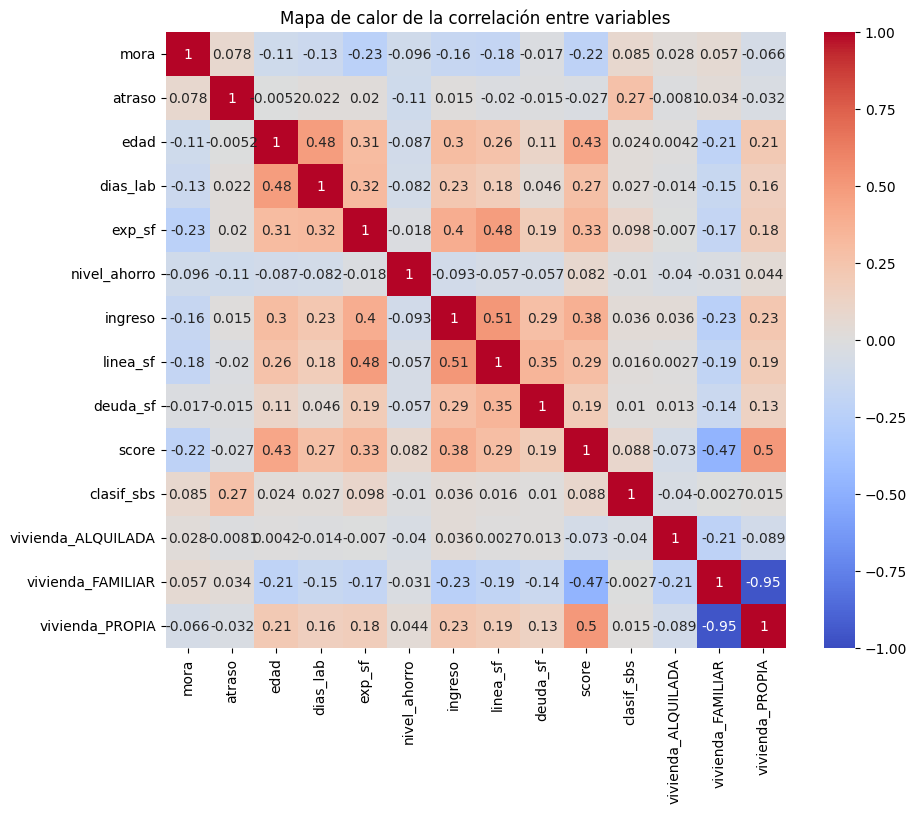

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un subset de solo las variables numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64','boolean'])

# Calcular la matriz de correlación
corr_matrix = numerical_df.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre variables')
plt.show()


In [429]:
from sklearn.model_selection import train_test_split

# Seleccionar características (features) y la variable objetivo (target)
X = df.drop(columns=['mora','zona'])
y = df['mora']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modelo Regresión logística

In [430]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_RL = accuracy_score(y_test, y_pred)
matrix_RL = confusion_matrix(y_test, y_pred)
reporte_RL = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_RL:.2f}')
print('Matriz de confusión:')
print(matrix_RL)
print('Reporte de clasificación:')
print(reporte_RL)


Precisión del modelo: 0.71
Matriz de confusión:
[[  95  430]
 [  51 1104]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.18      0.28       525
           1       0.72      0.96      0.82      1155

    accuracy                           0.71      1680
   macro avg       0.69      0.57      0.55      1680
weighted avg       0.70      0.71      0.65      1680



- Precisión del modelo: 0.71: La precisión total del modelo es del 71%, lo que significa que el modelo acierta en el 71% de las predicciones.
Reporte de clasificación:
Para la clase 0 (sin mora):
- Precisión (precision): 0.65: El 65% de las veces que el modelo predice "sin mora", es correcto.
- Recall: 0.18: Solo el 18% de las personas realmente sin mora fueron identificadas correctamente. Esto indica que el modelo está perdiendo muchos casos de clase 0.
- F1-Score: 0.28: Combina precisión y recall en una métrica. El F1 es bastante bajo, lo que indica que el modelo no funciona bien para la clase 0.
Para la clase 1 (con mora):
- Precisión: 0.72: El 72% de las veces que el modelo predice "con mora", es correcto.
- Recall: 0.96: El modelo captura el 96% de los casos reales de mora, lo cual es excelente.
- F1-Score: 0.82: Esto indica que el modelo es muy efectivo en predecir la clase 1.
- Conclusión: El modelo de regresión logística tiene un desempeño mucho mejor para la clase "con mora" (1) en comparación con la clase "sin mora" (0). El recall para la clase 0 es muy bajo, lo que significa que el modelo rara vez detecta correctamente los casos de personas sin mora.

### Modelo Árboles de decisión

In [431]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_AD = accuracy_score(y_test, y_pred)
matrix_AD = confusion_matrix(y_test, y_pred)
reporte_AD = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_AD:.2f}')
print('Matriz de confusión:')
print(matrix_AD)
print('Reporte de clasificación:')
print(reporte_AD)

Precisión del modelo: 0.82
Matriz de confusión:
[[ 366  159]
 [ 151 1004]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       525
           1       0.86      0.87      0.87      1155

    accuracy                           0.82      1680
   macro avg       0.79      0.78      0.78      1680
weighted avg       0.81      0.82      0.82      1680



- Precisión del modelo: 0.82: El modelo tiene una precisión general del 82%, lo que lo hace más preciso que la regresión logística.
Reporte de clasificación:
Para la clase 0 (sin mora):
- Precisión: 0.71: El 71% de las predicciones de "sin mora" son correctas.
- Recall: 0.71: El 71% de las personas realmente sin mora son correctamente identificadas.
- F1-Score: 0.71: Esto muestra que el modelo equilibra bien precisión y recall para la clase 0.
Para la clase 1 (con mora):
- Precisión: 0.87: El 87% de las veces que el modelo predice "con mora", es correcto.
- Recall: 0.87: El modelo captura el 87% de los casos reales de mora.
- F1-Score: 0.87: El rendimiento es bastante alto y consistente para la clase 1.
- Conclusión: El Árbol de Decisión es el mejor modelo de los tres, con una precisión más alta y un mejor equilibrio en la predicción de ambas clases (sin mora y con mora).


### Modelo SVM

In [432]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Support Vector Machine
model = SVC()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_SVM = accuracy_score(y_test, y_pred)
matrix_SVM = confusion_matrix(y_test, y_pred)
reporte_SVM = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_SVM:.2f}')
print('Matriz de confusión:')
print(matrix_SVM)
print('Reporte de clasificación:')
print(reporte_SVM)


Precisión del modelo: 0.70
Matriz de confusión:
[[  52  473]
 [  29 1126]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.10      0.17       525
           1       0.70      0.97      0.82      1155

    accuracy                           0.70      1680
   macro avg       0.67      0.54      0.49      1680
weighted avg       0.68      0.70      0.62      1680



- Precisión del modelo: 0.70: La precisión general del modelo es del 70%, similar a la de la regresión logística.
Reporte de clasificación:
Para la clase 0 (sin mora):
- Precisión: 0.64: El 64% de las predicciones de "sin mora" son correctas.
- Recall: 0.10: Solo el 10% de los casos reales de personas sin mora fueron correctamente identificados. Esto es extremadamente bajo.
- F1-Score: 0.17: El bajo F1-score indica un mal rendimiento para esta clase.
Para la clase 1 (con mora):
- Precisión: 0.70: El 70% de las veces que el modelo predice "con mora", es correcto.
- Recall: 0.97: El modelo captura el 97% de los casos reales de mora.
- F1-Score: 0.82: El rendimiento es bueno para la clase 1.
- Conclusión: Al igual que la regresión logística, el modelo SVM tiene problemas serios para predecir correctamente la clase "sin mora" (0), con un recall extremadamente bajo. Aunque funciona bien para la clase "con mora" (1), es poco útil para identificar personas sin mora.

### Interpretación General:
El Árbol de Decisión es el mejor modelo en términos de precisión y balance entre la predicción de ambas clases.
La Regresión Logística y SVM tienen problemas para identificar correctamente a las personas sin mora (clase 0), lo que podría ser un inconveniente si esta clase es importante en tu análisis.
Si necesitas un modelo que identifique bien ambos grupos, el Árbol de Decisión es la opción más sólida. para poder aplicar datos 

# FASE 5: Evaluación del modelo

In [433]:
import joblib
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load('modelo_arbol_decision.pkl')


In [434]:
# using traditional dtaset, i need to create a new dataset for validate the model
#Carga Dataset
new_values = pd.read_csv('prueba - prueba.csv', sep=",")

predicciones_nuevas = modelo_cargado.predict(new_values)

print(f'Predicciones para los nuevos datos: {predicciones_nuevas}')


Predicciones para los nuevos datos: [0 0 0 ... 1 1 1]


documentar procesos y compraciones de modelos realizados

# FASE 6: Despliegue